In [1]:
# find the power spectral density of a stations data
# and plot it
import numpy as np
import matplotlib.pyplot as plt
from obspy import read
from obspy.signal import PPSD
from obspy.imaging.cm import pqlx
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

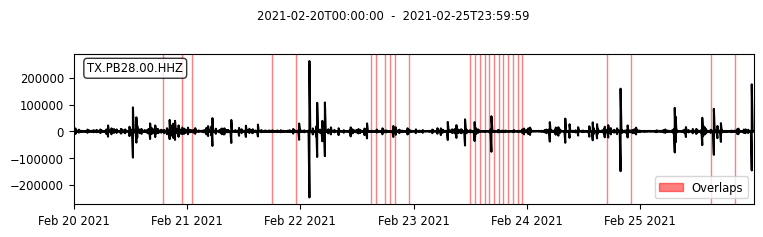

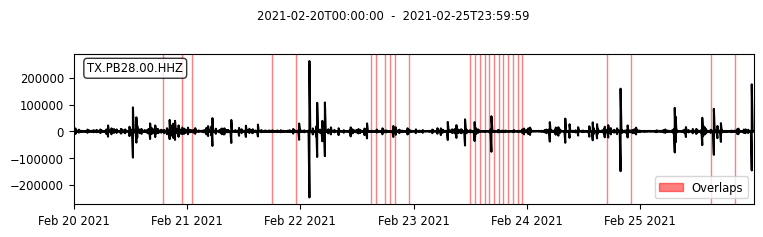

In [2]:
# getting the data for last three years
client = Client('texnet')
starttime = UTCDateTime('2021-02-20T00:00:00')
endtime = UTCDateTime('2021-02-25T23:59:59')
stream = client.get_waveforms('TX', 'PB28', '00', 'HHZ', starttime, endtime)
stream.plot()

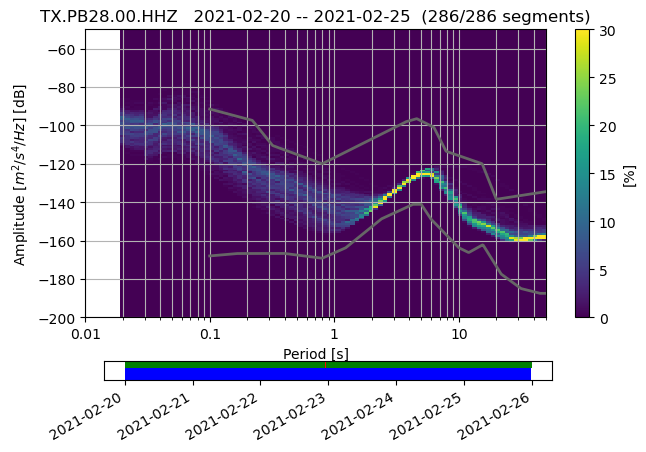

In [3]:
# get the power spectral density at the station
ppsd = PPSD(stream[0].stats, metadata=client.get_stations(network='TX', station='PB28', channel='HHZ', level='response'))
ppsd.add(stream)
ppsd.plot(show_coverage=True, period_lim=(0.01, 50))
plt.show()

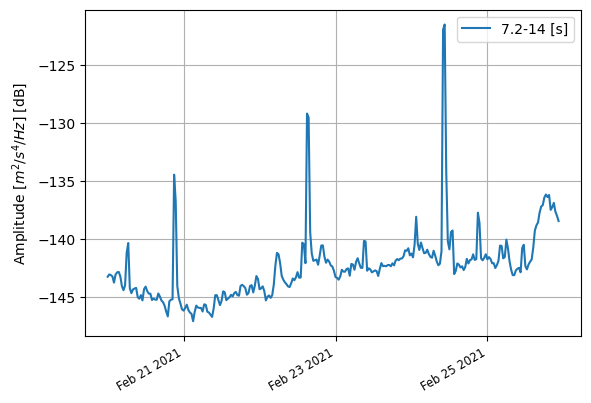

In [4]:
# plot the probability density function
ppsd.plot_temporal(period=10)
plt.show()